In [ ]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib as plt
import statistics 
import plotly.express as px
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV
import plotly.graph_objects as go
import plotly.express as px

Incluindo o conjunto de dados

In [ ]:
RLM_df = pd.DataFrame(data=[[1.087, 18.141, 37], [1.613, 42.404, 50], [0.953, 16.1, 34], [1.003, 13.605, 36], [1.156, 23.583, 43], [0.978, 7.71, 28], [1.092, 17.46, 37], [0.572, 3.855, 20], [0.940, 14.966, 34], [0.597, 4.308, 30], [0.838, 9.524, 38], [1.473, 35.828, 47]], columns=['Altura', 'Peso', 'Comprimento'])

In [ ]:
df = RLM_df.copy()

In [ ]:
df

,Altura,Peso,Comprimento
0,1.087,18.141,37
1,1.613,42.404,50
2,0.953,16.100,34
3,1.003,13.605,36
4,1.156,23.583,43
5,0.978,7.710,28
6,1.092,17.460,37
7,0.572,3.855,20
8,0.940,14.966,34
9,0.597,4.308,30


In [ ]:
ones = list()
for i in range(len(RLM_df)):
    ones.append(1)

In [ ]:
ones_df = pd.DataFrame(ones, columns=['Ones'])
ones_df

,Ones
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [ ]:
ones_RLM_df = pd.concat([ones_df, RLM_df], axis=1, sort=False)

In [ ]:
ones_RLM_df

,Ones,Altura,Peso,Comprimento
0,1,1.087,18.141,37
1,1,1.613,42.404,50
2,1,0.953,16.100,34
3,1,1.003,13.605,36
4,1,1.156,23.583,43
5,1,0.978,7.710,28
6,1,1.092,17.460,37
7,1,0.572,3.855,20
8,1,0.940,14.966,34
9,1,0.597,4.308,30


In [ ]:
X = ones_RLM_df.loc[:,'Ones':'Peso'] 
y = ones_RLM_df.loc[:,'Comprimento':]

In [ ]:
X.shape

(12, 3)

In [ ]:
y.shape

(12, 1)

In [ ]:
XtX = X.transpose().dot(X)
XtX_inv = np.linalg.inv(XtX)
Xty = X.transpose().dot(y)

In [ ]:
W = XtX_inv.dot(Xty)

In [ ]:
W

array([[20.40503643],
       [ 8.24643744],
       [ 0.42264411]])

In [ ]:
def predict(x1, x2, w1, w2, w0):
    y = w1*x1 + w2*x2 + w0
    return y

In [ ]:
w0 = W[0][0]
w1 = W[1][0]
w2 = W[2][0]
print("Os pesos encontrados foram w0 =", w0, " w1 = ", w1, "e w2 = ", w2)

Os pesos encontrados foram w0 = 20.40503643204306  w1 =  8.246437435193911 e w2 =  0.42264410502849614


In [ ]:
mesh_size = .02
margin = 0

x_min, x_max = RLM_df.Altura.min() - margin, RLM_df.Altura.max() + margin
y_min, y_max = RLM_df.Peso.min() - margin, RLM_df.Peso.max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

In [ ]:
params = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
result = []
for i in range(len(params)):
    tmp = predict(params[i][0], params[i][1], w1, w2, w0)
    result.append(tmp)

In [ ]:
result = np.array(result).reshape(xx.shape)
result.shape

(1928, 53)

In [ ]:
fig = px.scatter_3d(RLM_df, x='Altura', y='Peso', z='Comprimento')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=result, name='pred_surface'))
fig.show()

Conjunto Treino e Teste

In [ ]:
df = pd.DataFrame(data=[[1.087, 37], [1.613, 50], [0.953, 34], [1.003, 36], [1.156,43], [0.978, 28], [1.092, 37], [0.572, 20], [0.940, 34], [0.597, 30], [0.838, 38], [1.473, 47]], columns=['Altura','Comprimento']) 

In [ ]:
df

,Altura,Comprimento
0,1.087,37
1,1.613,50
2,0.953,34
3,1.003,36
4,1.156,43
5,0.978,28
6,1.092,37
7,0.572,20
8,0.940,34
9,0.597,30


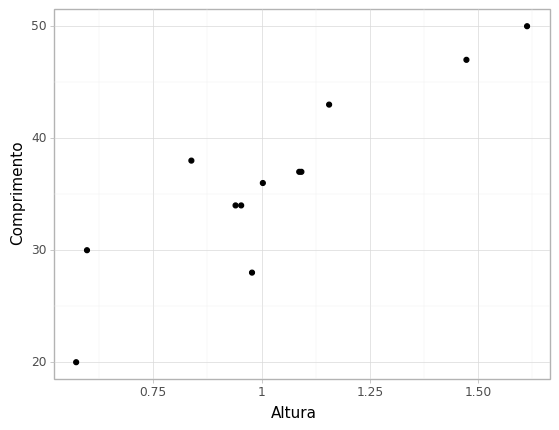

<ggplot: (8730484864193)>

In [ ]:
 (ggplot(df,aes('Altura','Comprimento'))
 + geom_point()
 + theme_light()
)

Gerando dados

In [ ]:
import random
import math


add_instances_into_dataset = 100

random.seed(1845)

size_df = len(df)

for i in range(add_instances_into_dataset):
    rand_altura = random.randrange(500, 2200)
    rand_altura /= 1000

    rand_comprimento = rand_altura*25 + random.randrange(10, 50)
    rand_comprimento = math.floor(rand_comprimento)

    new_row = {'Altura': rand_altura, 'Comprimento': rand_comprimento}
    df = df.append(new_row, ignore_index=True)

In [ ]:
df.shape

(112, 2)

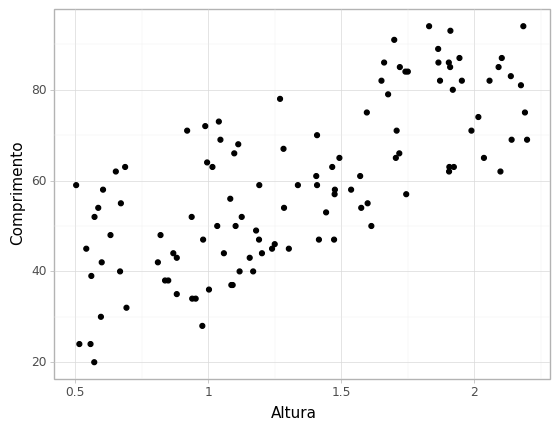

<ggplot: (8730485062569)>

In [ ]:
(ggplot(df,aes('Altura','Comprimento'))
 + geom_point()
 + theme_light()
)

In [ ]:
X = df[['Altura']]
Y = df[['Comprimento']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
print("TREINAMENTO:")
print("X:", X_train.shape, "y:", Y_train.shape)
print("TESTE:")
print("X:", X_test.shape, "y:", Y_test.shape)

TREINAMENTO:
X: (75, 1) y: (75, 1)
TESTE:
X: (37, 1) y: (37, 1)


In [ ]:
regr = linear_model.LinearRegression()
regr

LinearRegression()

In [ ]:
regr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = regr.predict(X_test)
y_pred.shape

(37, 1)

In [ ]:
print('Coefficient(s): \n', regr.coef_)
print('Intercept(s): \n', regr.intercept_)

# The mean squared error
print('Mean squared error: %.2f' %mean_squared_error(y_pred, Y_test))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' %r2_score(Y_test, y_pred))

Coefficient(s): 
 [[25.27840935]]
Intercept(s): 
 [25.84807003]
Mean squared error: 136.51
Coefficient of determination: 0.58
